In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

In [3]:
path = untar_data(URLs.MNIST)

In [4]:
path.ls()

[PosixPath('/home/jupyter/.fastai/data/mnist_png/testing'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/models')]

In [5]:
il = ImageList.from_folder(path, convert_mode='L')

In [6]:
il.items[0]

PosixPath('/home/jupyter/.fastai/data/mnist_png/testing/6/1602.png')

In [7]:
defaults.cmap = 'binary'

In [8]:
il

ImageList (70000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /home/jupyter/.fastai/data/mnist_png

In [9]:
sd = il.split_by_folder(train='training', valid='testing')

In [10]:
sd

ItemLists;

Train: ImageList (60000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /home/jupyter/.fastai/data/mnist_png;

Valid: ImageList (10000 items)
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
Path: /home/jupyter/.fastai/data/mnist_png;

Test: None

In [11]:
(path/'training').ls()

[PosixPath('/home/jupyter/.fastai/data/mnist_png/training/6'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/2'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/8'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/3'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/5'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/7'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/4'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/models'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/0'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/9'),
 PosixPath('/home/jupyter/.fastai/data/mnist_png/training/1')]

In [12]:
ll = sd.label_from_folder()

In [13]:
ll

LabelLists;

Train: LabelList (60000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
6,6,6,6,6
Path: /home/jupyter/.fastai/data/mnist_png;

Valid: LabelList (10000 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
6,6,6,6,6
Path: /home/jupyter/.fastai/data/mnist_png;

Test: None

In [14]:
x, y = ll.train[0]

Category 6

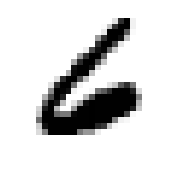

In [15]:
x.show(); y

In [16]:
tfms = ([*rand_pad(padding=3, size=28, mode='zeros')], [])

In [17]:
tfms

([RandTransform(tfm=TfmPixel (pad), kwargs={'padding': 3, 'mode': 'zeros'}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True),
  RandTransform(tfm=TfmPixel (crop), kwargs={'size': 28, 'row_pct': (0, 1), 'col_pct': (0, 1)}, p=1.0, resolved={}, do_run=True, is_random=True, use_on_y=True)],
 [])

In [18]:
ll = ll.transform(tfms)

In [19]:
bs = 128

In [20]:
data = ll.databunch(bs=bs).normalize()

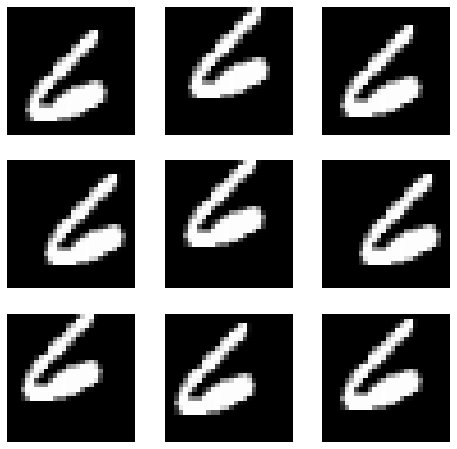

In [21]:
def _plot(i,j,ax): data.train_ds[0][0].show(ax, cmap='gray')
plot_multi(_plot, 3, 3, figsize=(8,8))

In [22]:
xb, yb = data.one_batch()
xb.shape, yb.shape

(torch.Size([128, 1, 28, 28]), torch.Size([128]))

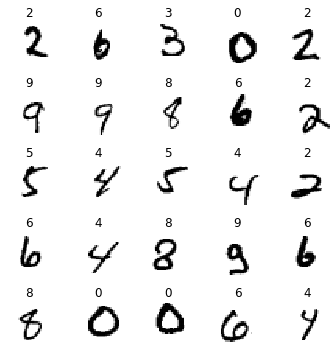

In [23]:
data.show_batch(row=5, figsize=(5, 5))

In [24]:
model = nn.Sequential(
    nn.Conv2d(1, 8, kernel_size=3, stride=2, padding=1),
    nn.BatchNorm2d(8),
    nn.ReLU(),
    nn.Conv2d(8, 16, kernel_size=3, stride=2, padding=1),
    nn.BatchNorm2d(16),
    nn.ReLU(),
    nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    nn.Conv2d(32, 16, kernel_size=3, stride=2, padding=1),
    nn.BatchNorm2d(16),
    nn.ReLU(),
    nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
    nn.BatchNorm2d(10),
    Flatten()
)

In [25]:
learner = Learner(data, model, loss_func=nn.CrossEntropyLoss(), metrics=accuracy)

In [26]:
learner.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 14, 14]          80         True      
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
______________________________________________________________________
ReLU                 [8, 14, 14]          0          False     
______________________________________________________________________
Conv2d               [16, 7, 7]           1,168      True      
______________________________________________________________________
BatchNorm2d          [16, 7, 7]           32         True      
______________________________________________________________________
ReLU                 [16, 7, 7]           0          False     
______________________________________________________________________
Conv2d               [32, 4, 4]           4,640      True      
___________________________________________________

In [27]:
xb = xb.cuda()

In [28]:
model(xb).shape

torch.Size([128, 10])

In [29]:
model(xb)

tensor([[-0.0787,  0.0950,  0.0657,  ...,  0.0409, -0.0319,  0.0847],
        [-0.0790,  0.0964,  0.0672,  ...,  0.0408, -0.0337,  0.0857],
        [-0.0758,  0.0985,  0.0658,  ...,  0.0375, -0.0353,  0.0838],
        ...,
        [-0.0814,  0.0939,  0.0627,  ...,  0.0373, -0.0301,  0.0817],
        [-0.0769,  0.0966,  0.0667,  ...,  0.0364, -0.0326,  0.0821],
        [-0.0790,  0.0972,  0.0646,  ...,  0.0411, -0.0335,  0.0834]],
       device='cuda:0', grad_fn=<ViewBackward>)

In [30]:
learner.lr_find(end_lr=100)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


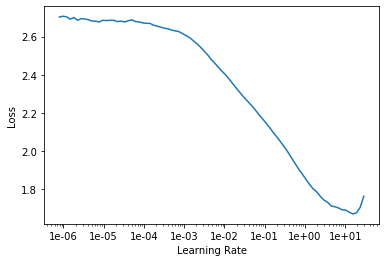

In [31]:
learner.recorder.plot()

In [32]:
learner.fit_one_cycle(3, max_lr=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,0.210303,1.394632,0.680800,02:19
1,0.122341,0.088476,0.973600,00:09
2,0.064893,0.040105,0.986600,00:08


## ResNet Style

In [33]:
class ResBlock(nn.Module):
    def __init__(self, nf):
        super().__init__()
        self.conv1 = nn.Conv2d(nf, nf, kernel_size=3, stride=2)
        self.conv2 = nn.Conv2d(nf, nf, kernel_size=3, stride=2)
    def forward(self, x):
        return x + self.conv2(self.conv1(x))

In [34]:
model = nn.Sequential(
    nn.Conv2d(1, 8, kernel_size=3, stride=2, padding=1),
    nn.BatchNorm2d(8),
    nn.ReLU(),
    res_block(8),
    nn.Conv2d(8, 16, kernel_size=3, stride=2, padding=1),
    nn.BatchNorm2d(16),
    nn.ReLU(),
    res_block(16),
    nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
    nn.BatchNorm2d(32),
    nn.ReLU(),
    res_block(32),
    nn.Conv2d(32, 16, kernel_size=3, stride=2, padding=1),
    nn.BatchNorm2d(16),
    nn.ReLU(),
    res_block(16),
    nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1),
    nn.BatchNorm2d(10),
    Flatten()
)

In [36]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


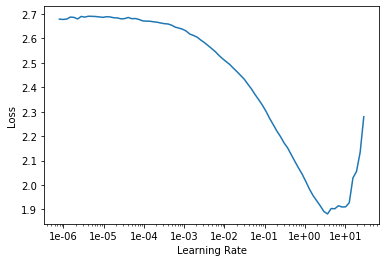

In [37]:
learn.lr_find(end_lr=100)
learn.recorder.plot()

In [38]:
learn.fit_one_cycle(12, max_lr=0.05)

epoch,train_loss,valid_loss,accuracy,time
0,0.189693,0.173423,0.948500,00:13
1,0.111935,0.086857,0.974600,00:13
2,0.096143,0.136993,0.956200,00:13
3,0.078174,0.091130,0.971700,00:13
4,0.069701,0.074668,0.978500,00:13
5,0.058801,0.114357,0.966900,00:13
6,0.048990,0.053572,0.984100,00:13
7,0.038239,0.037905,0.988800,00:13
8,0.033574,0.032595,0.989900,00:13
9,0.023953,0.017782,0.994100,00:13


In [39]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [8, 14, 14]          80         True      
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
______________________________________________________________________
ReLU                 [8, 14, 14]          0          False     
______________________________________________________________________
Conv2d               [8, 14, 14]          576        True      
______________________________________________________________________
ReLU                 [8, 14, 14]          0          False     
______________________________________________________________________
BatchNorm2d          [8, 14, 14]          16         True      
______________________________________________________________________
Conv2d               [8, 14, 14]          576        True      
___________________________________________________

In [42]:
mnist_model = learn.model

In [43]:
torch.save(mnist_model, "l7_custom_mnist_model")

/opt/anaconda3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Sequential. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/opt/anaconda3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type Conv2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/opt/anaconda3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type BatchNorm2d. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/opt/anaconda3/lib/python3.7/site-packages/torch/serialization.py:292: UserWarning: Couldn't retrieve source code for container of type ReLU. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/opt/anac

In [44]:
learn.save("learner_l7_full_mnist")

In [45]:
learn.path

PosixPath('/home/jupyter/.fastai/data/mnist_png')

In [55]:
learn.predict(data.train_ds[7000][0])

(Category 2,
 tensor(2),
 tensor([1.2750e-05, 6.2697e-06, 9.9995e-01, 2.7314e-06, 5.2550e-06, 8.3455e-07,
         8.7933e-06, 2.2247e-06, 5.4794e-06, 6.2468e-07]))

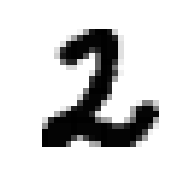

In [56]:
data.train_ds[7000][0].show()